In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Replace 'file_path.csv' with the path to your CSV file
file_path = 'de_experiment_results_parrallell_try_1000_allmetrics.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df = df.sort_values(by=['Popsize', 'Strategy']).reset_index(drop=True)

# Display the first few rows of the DataFrame
df

,Strategy,Popsize,MSE Overall Avg,MSE Overall Std,RMSE Overall Avg,RMSE Overall Std,MAE Overall Avg,MAE Overall Std,MAPE Overall Avg,MAPE Overall Std,Elapsed Time Avg,Elapsed Time Std
0,best1bin,14,22.349119,164.357897,0.796206,2.858203,0.796206,2.858203,inf,NaN,140.286596,72.531038
1,best1exp,14,10.606638,88.984012,0.528124,1.867005,0.528124,1.867005,0.013617,0.107062,139.991836,85.562015
2,best2bin,14,3.915119,78.860579,0.092999,1.283466,0.092999,1.283466,0.001505,0.023497,138.912422,90.960000
3,best2exp,14,3.747017,82.010487,0.070365,1.158028,0.070365,1.158028,0.007298,0.148191,137.752077,96.845913
4,currenttobest1bin,14,6.539725,102.192045,0.140785,1.691286,0.140785,1.691286,0.404866,11.371980,139.047459,89.354752
5,currenttobest1exp,14,2.793060,49.851965,0.091719,1.066230,0.091719,1.066230,0.002080,0.027403,140.282531,82.137691
6,rand1exp,14,3.808365,20.655519,0.391605,0.960955,0.391605,0.960955,0.006439,0.028635,137.866782,92.639611
7,rand1exp,14,3.808365,20.655519,0.391605,0.960955,0.391605,0.960955,0.006439,0.028635,139.580081,85.398630
8,rand2bin,14,3.724593,16.862016,0.458538,0.934339,0.458538,0.934339,0.006723,0.019291,140.329176,87.518521
9,rand2exp,14,4.652195,16.510632,0.606656,1.013812,0.606656,1.013812,0.009473,0.023924,141.152793,85.456279


In [3]:
strategies = df.loc[:, "Strategy"]
popsizes = df.loc[:, "Popsize"]
mse_overall_means = df.loc[:, "MSE Overall Avg"]
mse_overall_stds = df.loc[:, "MSE Overall Std"]

rmse_overall_means = df.loc[:, "RMSE Overall Avg"]
rmse_overall_stds = df.loc[:, "RMSE Overall Std"]

mae_overall_means = df.loc[:, "MAE Overall Avg"]
mae_overall_stds = df.loc[:, "MAE Overall Std"]

mape_overall_means = df.loc[:, "MAPE Overall Avg"]
mape_overall_stds = df.loc[:, "MAPE Overall Std"]

time_means = df.loc[:, "Elapsed Time Avg"]
time_stds = df.loc[:, "Elapsed Time Std"]

# Convert the selected columns into numpy arrays
strategies_arr = strategies.values
popsizes_arr = popsizes.values
mse_overall_means_arr = mse_overall_means.values
mse_overall_stds_arr = mse_overall_stds.values

mape_overall_means_arr = mape_overall_means.values
mape_overall_stds_arr = mape_overall_stds.values

time_means_arr = time_means.values
time_stds_arr = time_stds.values

In [4]:
np.min(mape_overall_means_arr), 

(3.6178314737356537e-06,)

In [5]:
index_of_best = np.argmin(mape_overall_means_arr)
best_strategy = strategies_arr[index_of_best]
best_popsize = popsizes_arr[index_of_best]
print(f"Best strategy: {best_strategy}, Best popsize: {best_popsize}")
df.loc[index_of_best, :]

Best strategy: randtobest1bin, Best popsize: 105


Strategy            randtobest1bin
Popsize                        105
MSE Overall Avg           0.000196
MSE Overall Std           0.006203
RMSE Overall Avg          0.000289
RMSE Overall Std          0.007503
MAE Overall Avg           0.000289
MAE Overall Std           0.007503
MAPE Overall Avg          0.000004
MAPE Overall Std          0.000093
Elapsed Time Avg       1079.697084
Elapsed Time Std        575.950431
Name: 166, dtype: object

/Users/maxwellyue/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc


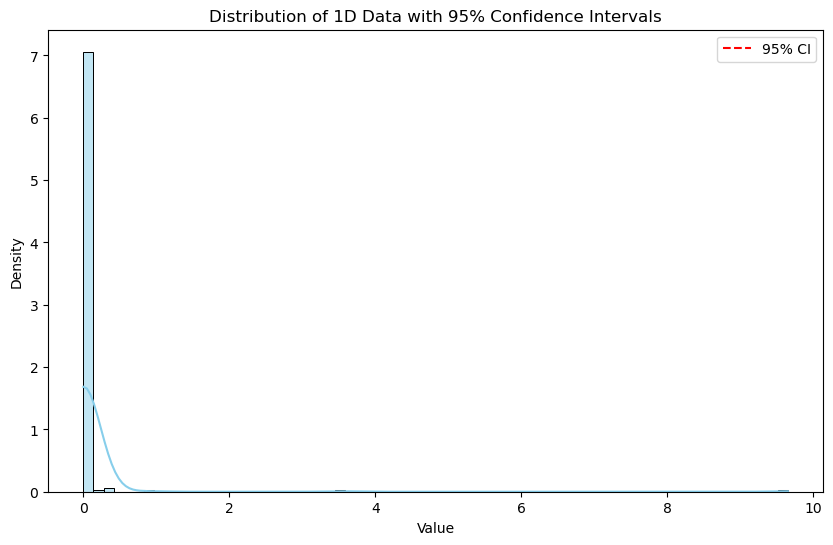

In [6]:
data = mape_overall_means

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Calculate the confidence interval
conf_interval = stats.expon.interval(0.95, scale=np.mean(data))

# Plot the histogram of the data with labeled 95% confidence intervals
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=70, kde=True, color='skyblue', stat='density')
plt.axvline(conf_interval[0], color='red', linestyle='--', label='95% CI')
plt.axvline(conf_interval[1], color='red', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of 1D Data with 95% Confidence Intervals')
plt.legend()

# Plot the KDE of the data
# sns.kdeplot(data, color='purple', linewidth=2, label='KDE')

plt.legend()
plt.show()

In [7]:
len(np.unique(popsizes_arr))

19

In [8]:
values = mape_overall_means_arr.reshape(len(np.unique(popsizes_arr)), 12).T
valuestds = mape_overall_stds_arr.reshape(len(np.unique(popsizes_arr)), 12).T
time_means = time_means_arr.reshape(len(np.unique(popsizes_arr)), 12).T
time_stds = time_stds_arr.reshape(len(np.unique(popsizes_arr)), 12).T

# values = mse_overall_means_arr.reshape(9, 12)
# valuestds = mse_overall_stds_arr.reshape(9, 12)
# time_means = time_means_arr.reshape(9, 12)
# time_stds = time_stds_arr.reshape(9, 12)

coords = np.array(list(zip(strategies_arr, popsizes_arr)))
coords = coords.reshape(len(np.unique(popsizes_arr)), 12, 2).transpose(1, 0, 2)
values.shape, coords.shape

((12, 19), (12, 19, 2))

In [9]:
coords[:,7,:]

array([['best1bin', '63'],
       ['best1exp', '63'],
       ['best2bin', '63'],
       ['best2exp', '63'],
       ['currenttobest1bin', '63'],
       ['currenttobest1exp', '63'],
       ['rand1exp', '63'],
       ['rand1exp', '63'],
       ['rand2bin', '63'],
       ['rand2exp', '63'],
       ['randtobest1bin', '63'],
       ['randtobest1exp', '63']], dtype='<U21')

In [10]:
df.loc[index_of_best, :]

Strategy            randtobest1bin
Popsize                        105
MSE Overall Avg           0.000196
MSE Overall Std           0.006203
RMSE Overall Avg          0.000289
RMSE Overall Std          0.007503
MAE Overall Avg           0.000289
MAE Overall Std           0.007503
MAPE Overall Avg          0.000004
MAPE Overall Std          0.000093
Elapsed Time Avg       1079.697084
Elapsed Time Std        575.950431
Name: 166, dtype: object

In [11]:
ind = np.unravel_index(np.argmin(values), values.shape)
values[ind], valuestds[ind], coords[ind]

(3.6178314737356537e-06,
 9.321030204064127e-05,
 array(['randtobest1bin', '105'], dtype='<U21'))

In [12]:
strategy_names = ['best/1/bin',
 'best/1/exp',
 'best/2/bin',
 'best/2/exp',
 'current-to-best/1/bin',
 'current-to-best/1/exp',
 'rand/1/bin',
 'rand/1/exp',
 'rand/2/bin',
 'rand/2/exp',
 'rand-to-best/1/bin',
 'rand-to-best/1/exp']

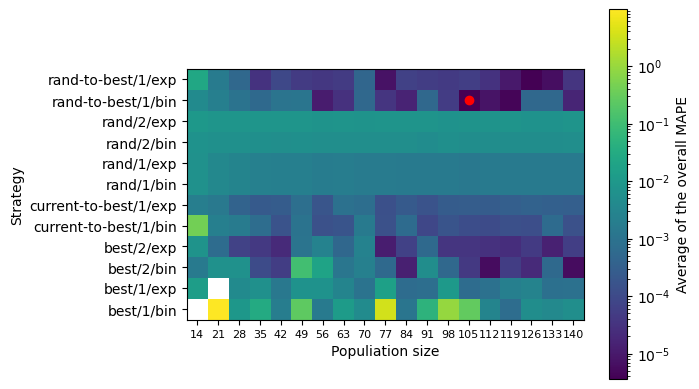

In [13]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(values, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.ylabel('Strategy')
plt.xlabel('Populiation size')
# plt.title('Heatmap of Array')
# # Set number of ticks on x and y axes
# plt.locator_params(axis='x', nbins=9)
# plt.locator_params(axis='y', nbins=12)

# Customize the names of ticks on x and y axes
x_tick_positions = np.linspace(0, len(np.unique(popsizes_arr))-1, len(np.unique(popsizes_arr)))  # Adjust the range and number of ticks as needed
x_tick_labels = ['14', '21', '28', '35', '42', '49', '56', '63', '70', '77', '84', '91', '98', '105', '112', '119', '126', '133', '140']
plt.xticks(x_tick_positions, x_tick_labels, fontsize=8)

y_tick_positions = np.linspace(0, 11, 12)  # Adjust the range and number of ticks as needed
y_tick_labels = strategy_names
plt.yticks(y_tick_positions, y_tick_labels)

plt.colorbar(label='Average of the overall MAPE')
plt.show()

In [14]:
df[(df['Strategy'] == 'best1exp') & (df['Popsize'] == 21)]

,Strategy,Popsize,MSE Overall Avg,MSE Overall Std,RMSE Overall Avg,RMSE Overall Std,MAE Overall Avg,MAE Overall Std,MAPE Overall Avg,MAPE Overall Std,Elapsed Time Avg,Elapsed Time Std
13,best1exp,21,10.542375,104.412618,0.411169,2.031612,0.411169,2.031612,inf,NaN,215.812244,158.051454


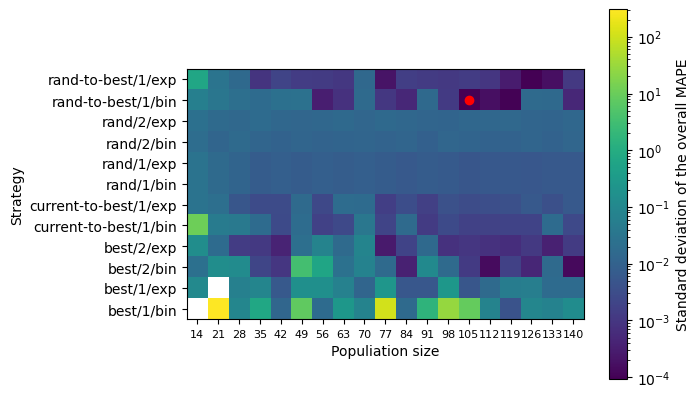

In [15]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(valuestds, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.ylabel('Strategy')
plt.xlabel('Populiation size')
# plt.title('Heatmap of Array')
# Set number of ticks on x and y axes
# plt.locator_params(axis='x', nbins=9)
# plt.locator_params(axis='y', nbins=12)

# Customize the names of ticks on x and y axes
x_tick_positions = np.linspace(0, len(np.unique(popsizes_arr))-1, len(np.unique(popsizes_arr)))  # Adjust the range and number of ticks as needed
x_tick_labels = ['14', '21', '28', '35', '42', '49', '56', '63', '70', '77', '84', '91', '98', '105', '112', '119', '126', '133', '140']
plt.xticks(x_tick_positions, x_tick_labels, fontsize=8)

y_tick_positions = np.linspace(0, 11, 12)  # Adjust the range and number of ticks as needed
y_tick_labels = strategy_names
plt.yticks(y_tick_positions, y_tick_labels)

plt.colorbar(label='Standard deviation of the overall MAPE')
plt.show()

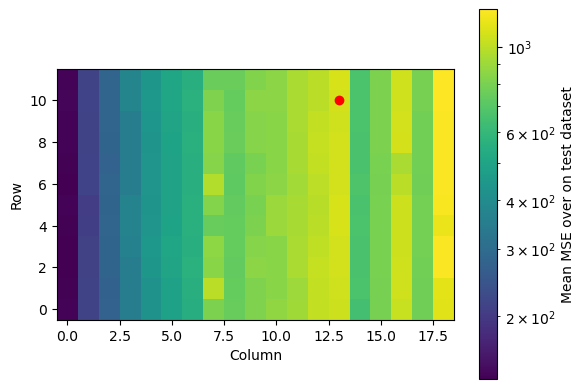

In [16]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(time_means, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

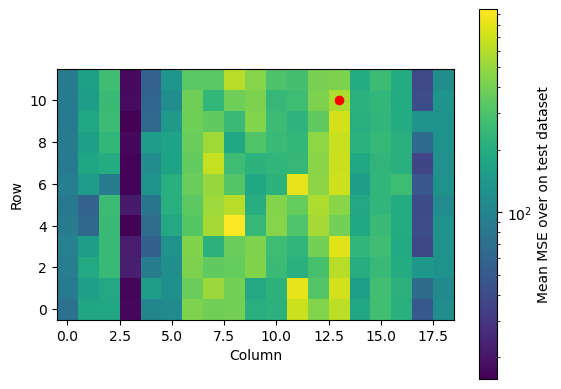

In [17]:
# colors_array_reshaped = colors.reshape(100, 1, 4)

# Display the colors using imshow
plt.imshow(time_stds, cmap='viridis', aspect='equal', origin='lower', norm='log')
plt.plot(ind[1], ind[0], 'ro')
plt.xlabel('Column')
plt.ylabel('Row')
# plt.title('Heatmap of Array')
plt.colorbar(label='Mean MSE over on test dataset')
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example data: a 2D array representing the colormap
# data = np.random.randint(0, 6, size=(10, 10))

# Define colors for each value
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Create a ListedColormap
cmap = ListedColormap(colors)

# Plot the colormap
plt.imshow(np.column_stack((x, y)), cmap=cmap, interpolation='nearest')
plt.colorbar(label='Discrete Values')
plt.title('Colormap')
plt.show()


NameError: name 'x' is not defined